# Классификация СC50 превышает медианное значение

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
target = 'CC50, mM'

In [101]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [102]:
df["CC50_gt_median"] = (df[target] > df[target].median()).astype(int)

In [103]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,CC50_gt_median
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000,0
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000,0
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000,0
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294,0
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017,0
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484,0
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761,0
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272,0


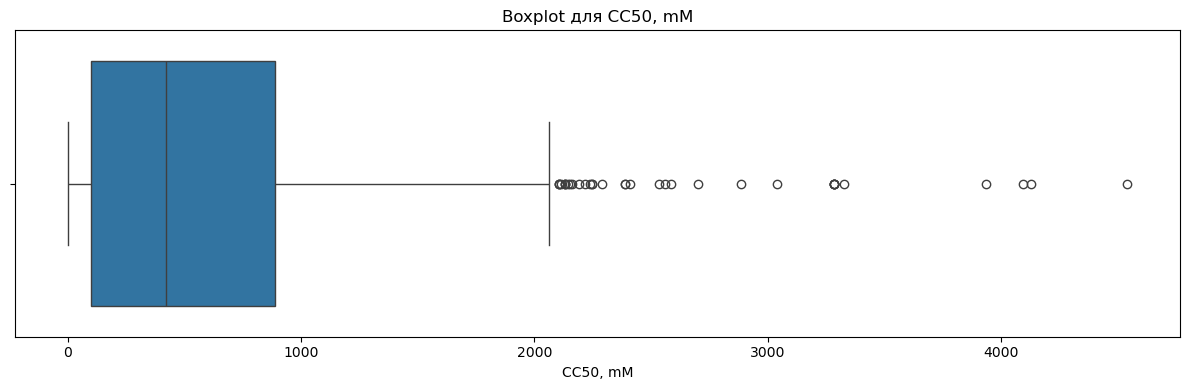

In [104]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [105]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,CC50_gt_median
29,0.167835,-0.492682,-0.336254,-0.374021,-1.320181,-0.844268,1.703838,0.676161,1.738376,0.600354,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,4095.188563,4095.188563,1.000000,1
30,0.189542,-0.534596,0.041379,-0.600427,-1.479133,-0.859744,1.703837,0.676161,1.996858,0.598273,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,4128.529377,4128.529377,1.000000,1
49,-0.635122,0.032249,0.729359,0.664412,1.022232,-1.227931,-1.369949,0.189156,1.184487,-0.484354,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,13.824389,2560.072092,185.185185,1
80,-0.621559,0.484260,0.778045,0.676892,1.203891,-1.212109,-1.425447,0.181197,0.889080,-0.484343,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,83.619244,2533.916472,30.303030,1
82,0.279511,-1.022494,0.606901,-0.271209,1.382454,-1.565942,-0.732016,1.457456,0.915935,-0.491791,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,32.843311,3284.331113,100.000000,1
83,0.279511,-1.022494,0.606901,-0.271209,1.382454,-1.565942,-0.732016,1.457456,0.915935,-0.491791,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,2200.501846,3284.331113,1.492537,1
84,0.207366,-0.912915,0.627556,-0.271209,1.382454,-1.565942,-0.771254,1.449725,0.915935,-0.491883,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,679.856540,3284.331113,4.830918,1
94,0.207366,-0.912915,0.627556,-0.271209,1.382454,-1.565942,-0.771254,1.449725,0.915935,-0.491883,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,1646.106754,3284.331113,1.995211,1
95,0.279511,-1.022494,0.606901,-0.271209,1.382454,-1.565942,-0.732016,1.457456,0.915935,-0.491791,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,3284.331113,3284.331113,1.000000,1
110,-1.850559,1.442062,0.881210,0.261183,1.022232,-1.243408,-1.558355,1.522779,0.889080,-0.582397,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,19.655003,2586.184602,131.578947,1


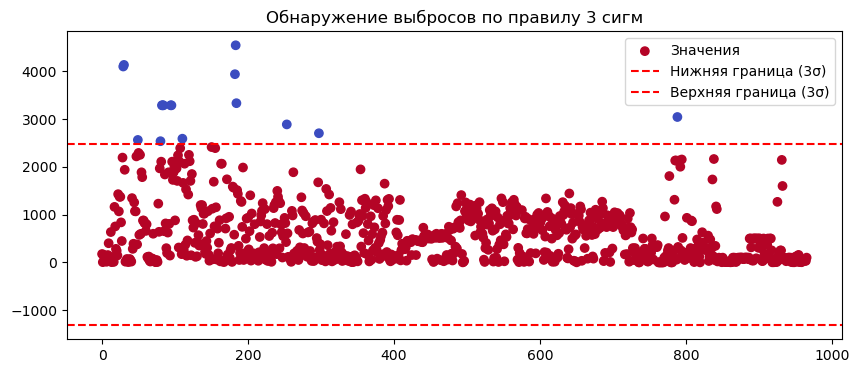

In [106]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [107]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,CC50_gt_median,is_outlier_3σ,is_outlier_IQR
28,0.162671,-0.598151,0.036863,-0.765315,-1.485425,-0.969830,1.703837,0.676161,1.893465,0.598264,...,-0.238522,-0.27518,-0.169643,-0.085436,1472.457163,2191.156492,1.488095,1,False,True
29,0.167835,-0.492682,-0.336254,-0.374021,-1.320181,-0.844268,1.703838,0.676161,1.738376,0.600354,...,-0.238522,-0.27518,-0.169643,-0.085436,4095.188563,4095.188563,1.000000,1,True,True
30,0.189542,-0.534596,0.041379,-0.600427,-1.479133,-0.859744,1.703837,0.676161,1.996858,0.598273,...,-0.238522,-0.27518,-0.169643,-0.085436,4128.529377,4128.529377,1.000000,1,True,True
47,-1.758664,1.295320,0.865404,-1.586508,0.639545,0.918595,-1.556297,1.522921,-2.534171,-0.581647,...,-0.238522,-0.27518,7.131714,-0.085436,45.006900,2216.216562,49.241706,1,False,True
49,-0.635122,0.032249,0.729359,0.664412,1.022232,-1.227931,-1.369949,0.189156,1.184487,-0.484354,...,-0.238522,-0.27518,-0.169643,-0.085436,13.824389,2560.072092,185.185185,1,True,True
50,-0.635122,0.032249,0.729359,0.664412,1.022232,-1.227931,-1.369949,0.189156,1.184487,-0.484354,...,-0.238522,-0.27518,-0.169643,-0.085436,3.584101,2288.704450,638.571429,1,False,True
52,-1.826221,1.260922,0.861699,0.649104,0.751162,-1.015482,-1.456664,1.337425,0.704450,-0.564981,...,-0.238522,-0.27518,-0.169643,-0.085436,37.324004,2248.433966,60.240964,1,False,True
80,-0.621559,0.484260,0.778045,0.676892,1.203891,-1.212109,-1.425447,0.181197,0.889080,-0.484343,...,-0.238522,-0.27518,-0.169643,-0.085436,83.619244,2533.916472,30.303030,1,True,True
81,-1.804546,1.252536,0.860796,0.426238,0.681620,-0.897486,-1.094176,1.049085,0.385150,-0.550391,...,-0.238522,-0.27518,-0.169643,-0.085436,4.212087,2106.043502,500.000000,1,False,True
82,0.279511,-1.022494,0.606901,-0.271209,1.382454,-1.565942,-0.732016,1.457456,0.915935,-0.491791,...,-0.238522,-0.27518,-0.169643,-0.085436,32.843311,3284.331113,100.000000,1,True,True


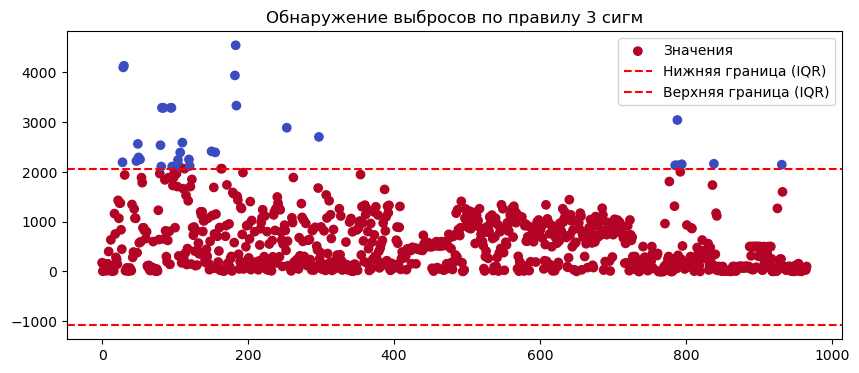

In [108]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Очистка выбросов по межквартильному размаху слишком сильно снизит число обучающего материала. Отбросим выбросы по правилу 3 sigma

In [109]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,CC50_gt_median,is_outlier_3σ,is_outlier_IQR
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000,0,False,False
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000,0,False,False
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000,0,False,False
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294,0,False,False
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017,0,False,False
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484,0,False,False
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761,0,False,False
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272,0,False,False


In [110]:
target_old = target
target = "CC50_gt_median"

In [111]:
# data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM",SI,CC50_gt_median
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,28.125000,0
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,7.000000,0
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,0.720000,0
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436,1.705624,63.235294,0
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,1.129017,0
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,1.062484,0
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,1.096761,0
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,1.031272,0


In [112]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

In [113]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,6.369345,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.179657,3.613328,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436


In [114]:
y_ic50

0      0
1      0
2      0
3      0
4      0
      ..
961    0
962    0
963    0
964    0
965    0
Name: CC50_gt_median, Length: 950, dtype: int64

In [115]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

In [116]:
class_ratio = np.mean(y_train_ic50)
print(f"Баланс классов: {class_ratio:.2f} / {1-class_ratio:.2f}")

Баланс классов: 0.50 / 0.50


## Инициализация моделей и метрик

In [117]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (roc_auc_score, f1_score, precision_score, 
                             recall_score, confusion_matrix, roc_curve)
import numpy as np

In [118]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [119]:
MODELS = {
    'logreg': LogisticRegression(random_state=RANDOM_STATE),
    'rf': RandomForestClassifier(random_state=RANDOM_STATE),
    'xgb': XGBClassifier(random_state=RANDOM_STATE),
}

metrics = {
    'ROC-AUC': roc_auc_score,
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='binary'),
    'PRECISION': lambda y_true, y_pred: precision_score(y_true, y_pred, average='binary'),
    'RECALL': lambda y_true, y_pred: recall_score(y_true, y_pred, average='binary')
}

## Бейзлайн

Проверим перечисленные модели

In [120]:
results = []

for name, model in MODELS.items():
    cv_scores = cross_val_score(model, X_train, y_train_ic50,
                               cv=5, scoring='roc_auc', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    model_metrics = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == 'ROC-AUC':
            model_metrics[metric_name] = metric_func(y_test_ic50, y_proba)
        else:
            model_metrics[metric_name] = metric_func(y_test_ic50, y_pred)
    
    results.append({
        'model': name,
        'cv_mean_roc_auc': np.mean(cv_scores),
        'cv_std_roc_auc': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

    model  cv_mean_roc_auc  cv_std_roc_auc   ROC-AUC        F1  PRECISION  \
0  logreg         0.805219        0.028651  0.789245  0.666667   0.626866   
1      rf         0.829778        0.027205  0.819613  0.700855   0.706897   
2     xgb         0.811805        0.025622  0.793684  0.689076   0.683333   

     RECALL  
0  0.711864  
1  0.694915  
2  0.694915  


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

## Оптимизация

Будем оптимизировать при помощи Optuna

In [121]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [122]:
N_TRIALS_LR = 100
CV_FOLDS_LR = 10

N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

### LogisticRegression

In [123]:
def optimize_lr(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 100, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': 'saga',
        'max_iter': 1000,
        'random_state': RANDOM_STATE
    }
    model = LogisticRegression(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_LR, scoring='roc_auc', n_jobs=-1
    ).mean()

In [124]:
study_lr = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_lr.optimize(optimize_lr, n_trials=N_TRIALS_LR, n_jobs=1)

[I 2025-06-04 00:22:56,682] A new study created in memory with name: no-name-2c53afc4-62a1-4e18-84db-f9f77342dee4
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-06-04 00:22:58,622] Trial 0 finished with value: 0.8112759146341464 and parameters: {'C': 0.3148911647956863, 'penalty': 'l1'}. Best is trial 0 with value: 0.8112759146341464.
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

In [125]:
print(f"Лучшие параметры для Logistic Regression:")
print(study_lr.best_params)
print(f"Лучший ROC-AUC: {study_lr.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_lr)
fig.show()

fig = optuna.visualization.plot_param_importances(study_lr)
fig.show()

Лучшие параметры для Logistic Regression:
{'C': 0.02528472530732487, 'penalty': 'l2'}
Лучший ROC-AUC: 0.8181


In [126]:
best_params_lr = study_lr.best_params
best_params_lr.update({
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': RANDOM_STATE
})
best_lr_model = LogisticRegression(**best_params_lr)

In [127]:
best_lr_model.fit(X_train, y_train_ic50)
y_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = best_lr_model.predict(X_test)

In [128]:
final_metrics_lr = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_lr),
    'f1': f1_score(y_test_ic50, y_pred_lr),
    'precision': precision_score(y_test_ic50, y_pred_lr),
    'recall': recall_score(y_test_ic50, y_pred_lr),
    'accuracy': (y_pred_lr == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_lr.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7856
f1: 0.6565
precision: 0.5972
recall: 0.7288
accuracy: 0.6853


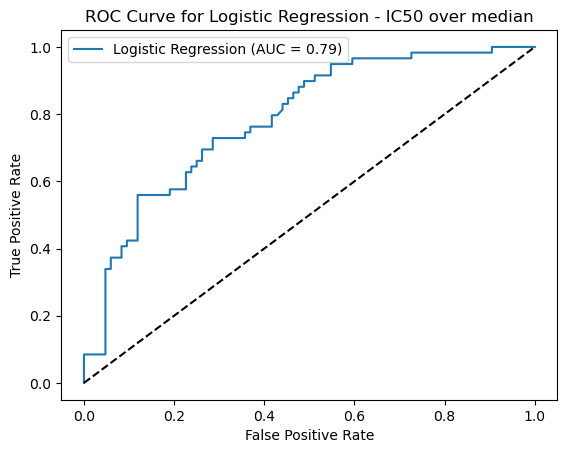

In [ ]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_lr)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {final_metrics_lr["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Logistic Regression - CC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Logistic Regression - IC50 over median')

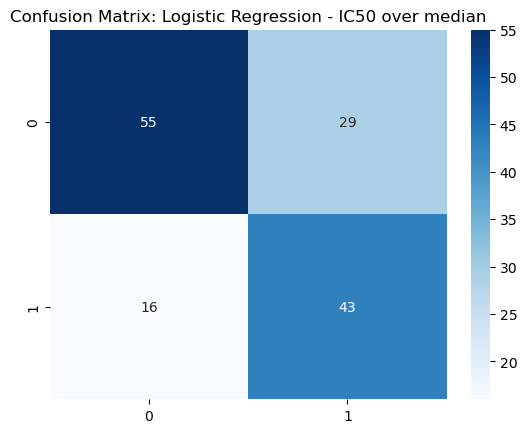

In [ ]:
cm = confusion_matrix(y_test_ic50, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Logistic Regression - CC50 over median')

In [ ]:
if hasattr(best_lr_model, 'feature_importances_'):
    importances = best_lr_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - CC50 over median')
    plt.tight_layout()

### Random Forest

In [132]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': True,
        'random_state': RANDOM_STATE,
        'n_jobs': -1
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_RF, scoring='roc_auc', n_jobs=-1
    ).mean()

In [133]:
study_rf = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-04 00:23:27,206] A new study created in memory with name: no-name-ce1c98e5-e311-44f2-bc3d-fd46192cd032
[I 2025-06-04 00:23:28,447] Trial 0 finished with value: 0.8314268292682927 and parameters: {'n_estimators': 437, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8314268292682927.
[I 2025-06-04 00:23:28,838] Trial 1 finished with value: 0.829952743902439 and parameters: {'n_estimators': 152, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.8314268292682927.
[I 2025-06-04 00:23:30,802] Trial 2 finished with value: 0.8303536585365853 and parameters: {'n_estimators': 850, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.8314268292682927.
[I 2025-06-04 00:23:32,124] Trial 3 finished with value: 0.8312469512195122 and parameters: {'n_estimators': 489, 'max_depth': 12, '

In [134]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший ROC-AUC: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}
Лучший ROC-AUC: 0.8367


In [135]:
best_params_rf = study_rf.best_params
best_rf_model = RandomForestClassifier(**best_params_rf)

In [136]:
best_rf_model.fit(X_train, y_train_ic50)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = best_rf_model.predict(X_test)

In [137]:
final_metrics_rf = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_rf),
    'f1': f1_score(y_test_ic50, y_pred_rf),
    'precision': precision_score(y_test_ic50, y_pred_rf),
    'recall': recall_score(y_test_ic50, y_pred_rf),
    'accuracy': (y_pred_rf == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.8139
f1: 0.6942
precision: 0.6774
recall: 0.7119
accuracy: 0.7413


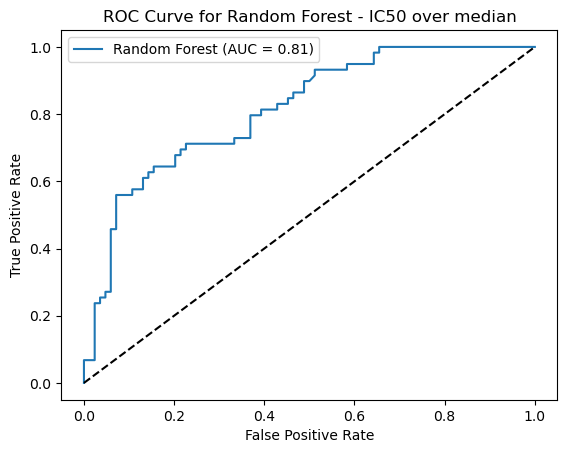

In [ ]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Random Forest - CC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - IC50 over median')

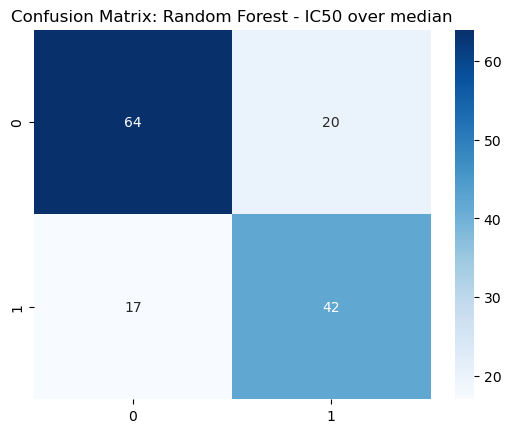

In [ ]:
cm = confusion_matrix(y_test_ic50, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - CC50 over median')

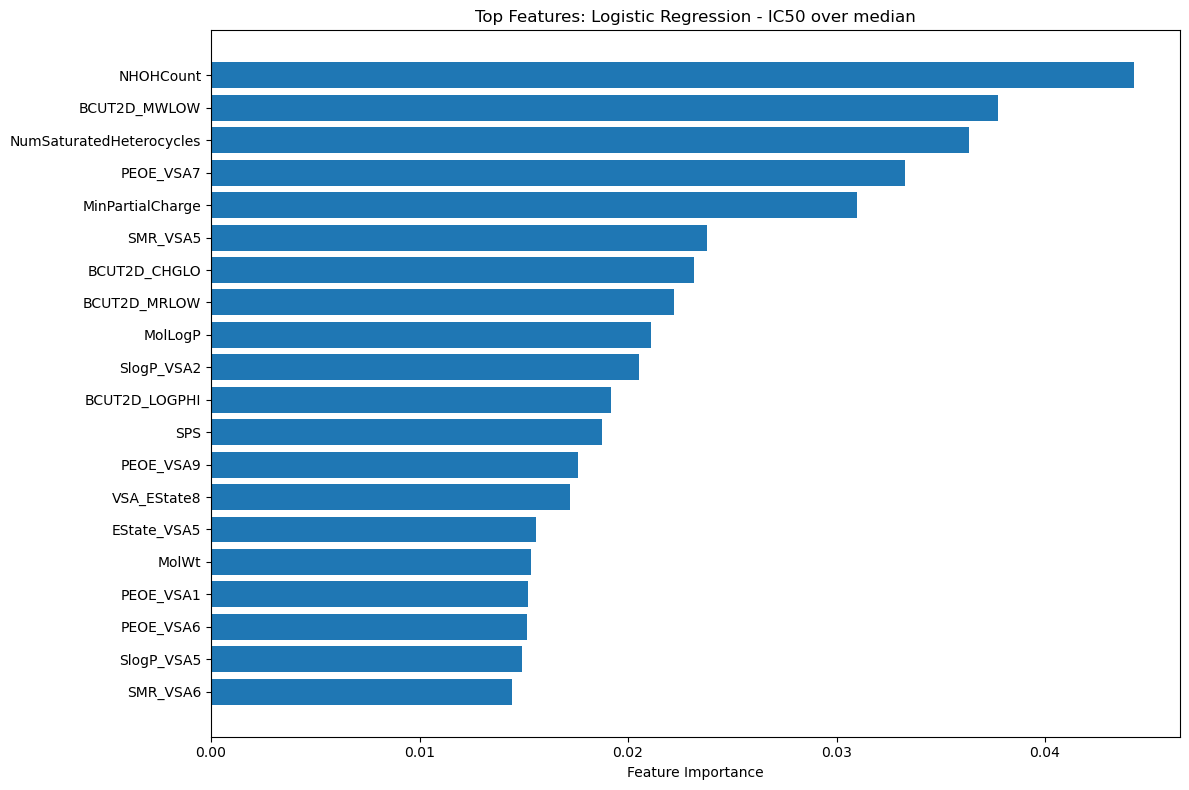

In [ ]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - CC50 over median')
    plt.tight_layout()

### XGBoost

In [141]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'use_label_encoder': False,
        'eval_metric': 'auc',
        'random_state': RANDOM_STATE
    }
    model = XGBClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_XGB, scoring='roc_auc', n_jobs=-1
    ).mean()

In [142]:
study_xgb = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-04 00:24:51,565] A new study created in memory with name: no-name-2fb0016f-662d-459c-8c29-cc43f638e71b
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:24:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:24:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:24:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat

In [143]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший ROC-AUC: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 392, 'max_depth': 4, 'learning_rate': 0.010301732495314466, 'subsample': 0.6986583104042349, 'colsample_bytree': 0.7233243316635783, 'gamma': 1.1467011888939354, 'reg_alpha': 0.6070975608241395, 'reg_lambda': 0.9079474672852651}
Лучший ROC-AUC: 0.8362


In [144]:
best_params_xgb = study_xgb.best_params
best_xgb_model = XGBClassifier(**best_params_xgb)

In [145]:
best_xgb_model.fit(X_train, y_train_ic50)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = best_xgb_model.predict(X_test)

In [146]:
final_metrics_xgb = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_xgb),
    'f1': f1_score(y_test_ic50, y_pred_xgb),
    'precision': precision_score(y_test_ic50, y_pred_xgb),
    'recall': recall_score(y_test_ic50, y_pred_xgb),
    'accuracy': (y_pred_xgb == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.8139
f1: 0.6942
precision: 0.6774
recall: 0.7119
accuracy: 0.7413


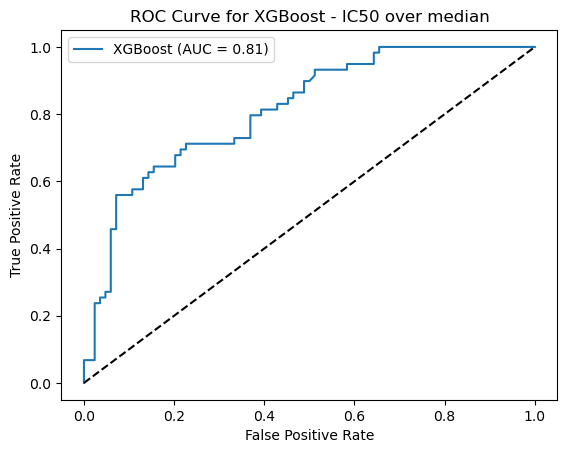

In [147]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for XGBoost - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - IC50 over median')

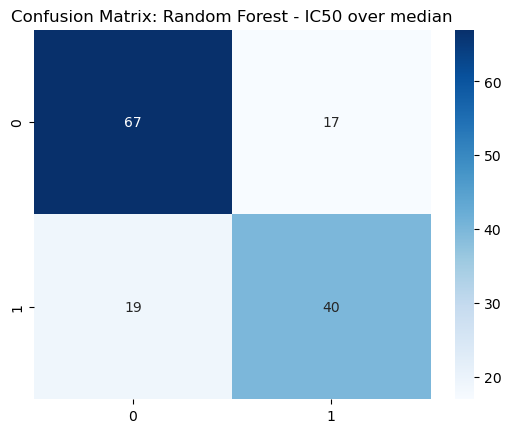

In [148]:
cm = confusion_matrix(y_test_ic50, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - IC50 over median')

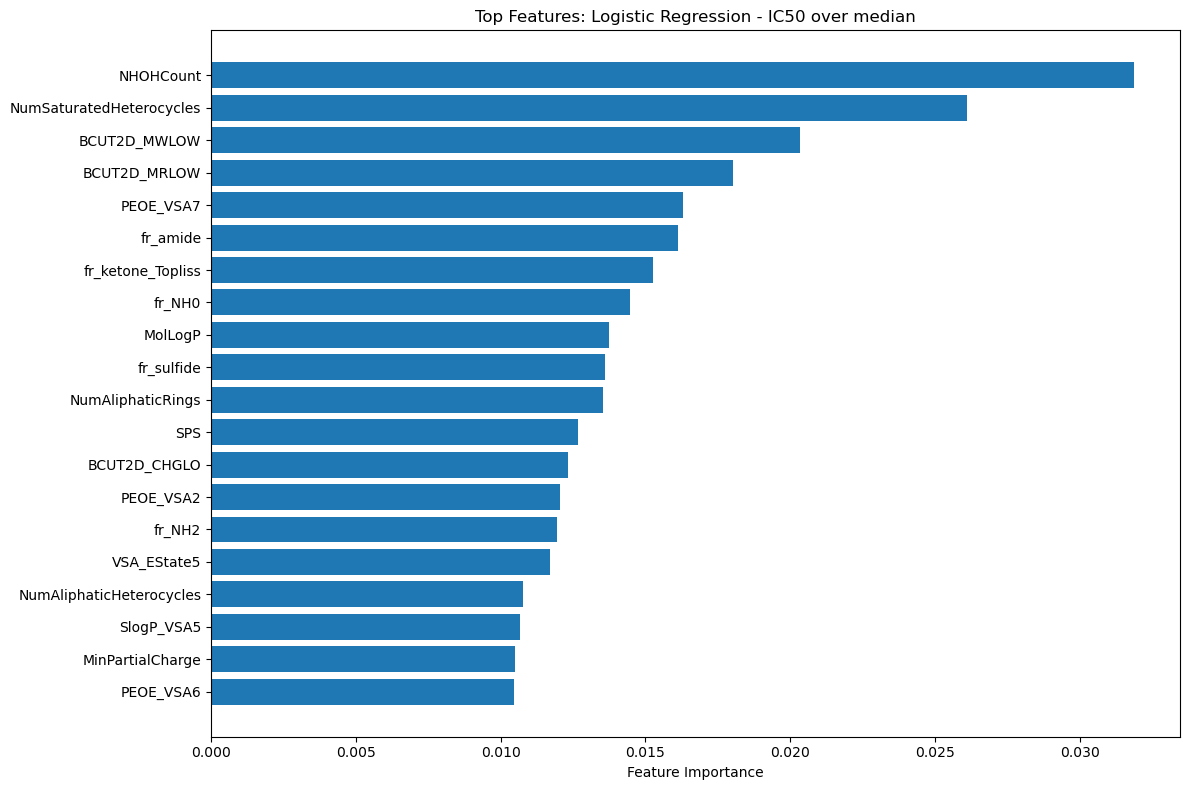

In [149]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

## Сравнение моделей

In [150]:
metrics_comparisson = {
    "LR": final_metrics_lr,
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [151]:
df_metrics

,LR,RF,XGB
roc_auc,0.785613,0.813862,0.804379
f1,0.656489,0.694215,0.689655
precision,0.597222,0.677419,0.701754
recall,0.728814,0.711864,0.677966
accuracy,0.685315,0.741259,0.748252


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

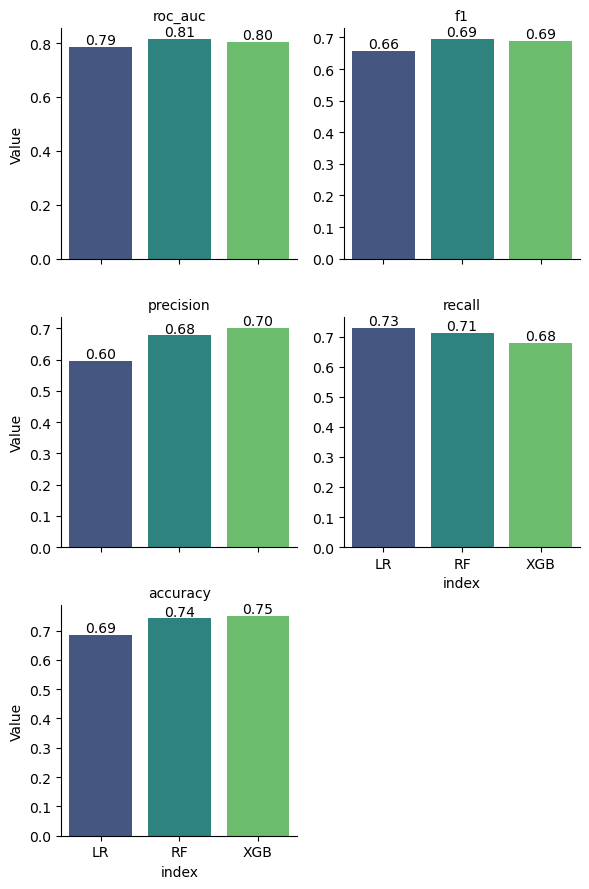

In [152]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Как видно, модель RF в совокупности даёт лучшие результаты